In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Question 3.4

In [2]:
def Izhikevich(I,a,b,c,d):
    Vt=30
    V_r = -65 # resting voltage
    spike=80
    dt=0.02
    T = (I.size)*dt
    time = np.arange(0, T, dt)
    V = (-65)*np.ones(len(time))
    U = np.zeros(len(time))
    U[0]=b*V[0]
    
    for i in range(0, len(time)-1):
        #U[current]=slope of U[previous]*time(current-previous)
        U[i+1]=U[i]+dt*(a*(b*V[i]-U[i]))
        #V[current]=slope of V[previous]*time(current-previous)
        V[i+1]=V[i]+dt*(0.04*V[i]**2+5*V[i]+140-U[i]+I[i])
        
        # "when v reaches 30 mV, the cell fires, and then v is reset to c, and u increases by d"
        if V[i+1]>Vt:
            V[i+1]=c
            U[i+1]=U[i+1]+d
    return V

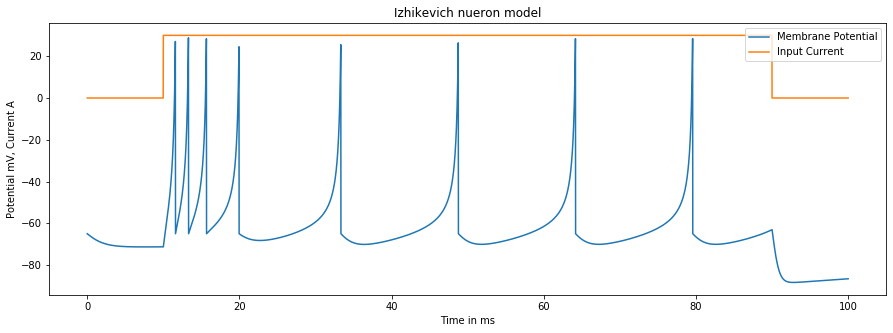

In [3]:
T = 100                     
dt  = 0.02                  
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[500:4500] = 30

V=Izhikevich(I=I,a=0.02,b=0.2,c=-65,d=8)

fig = plt.figure("Izh", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Izhikevich nueron model")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper right")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in ms");

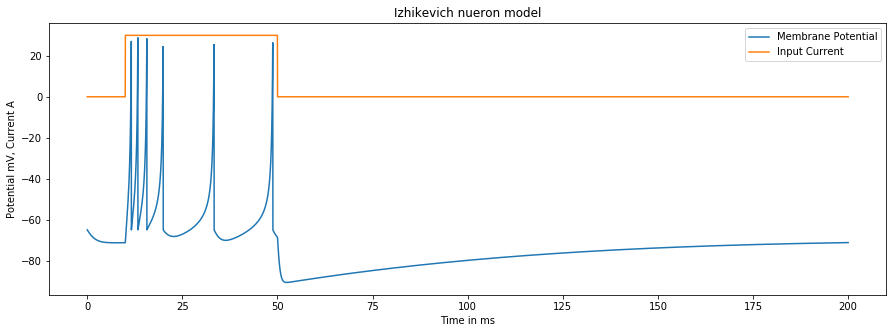

In [4]:
T = 200                     
dt  = 0.02                  
time = np.arange(0, T+dt, dt) 
I = np.zeros(len(time))
I[500:2500] = 30

V=Izhikevich(I=I,a=0.02,b=0.2,c=-65,d=8)

fig = plt.figure("Izh", figsize=(15, 5))
ax = fig.add_subplot(111)
plt.title("Izhikevich nueron model")


lineV = plt.plot(time, V, label="Membrane Potential")[0]
lineI = plt.plot(time, I, label="Input Current")[0]

plt.legend(loc="upper right")

# add axis labels
plt.ylabel("Potential mV, Current A")
plt.xlabel("Time in ms");